In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

Text(0, 0.5, 'Position Embedding')

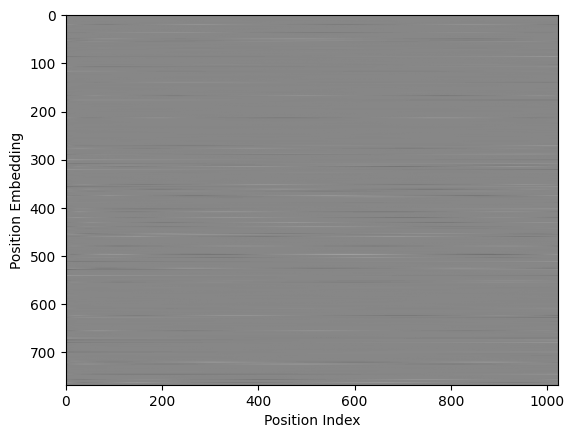

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"].T, cmap="gray")

plt.xlabel('Position Index')
plt.ylabel('Position Embedding')

Text(0.5, 1.0, '3 Position embedding channels v.s. Position index')

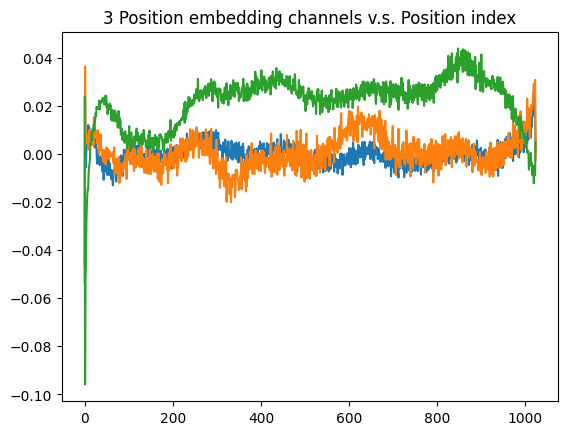

In [17]:
%matplotlib inline
plt.plot(sd_hf['transformer.wpe.weight'].T[150,:])
plt.plot(sd_hf['transformer.wpe.weight'].T[200,:])
plt.plot(sd_hf['transformer.wpe.weight'].T[250,:])
plt.title("3 Position embedding channels v.s. Position index")

Andrej claims the noise indicates this model is "under-trained". 

TODO - First 255 token embeddings look vastly different from the rest. And they are. They're the letters. But what is this "looks like"-ness? How could we be more precise in what we mean? and what does that imply that the model seems to be making a point to encode letter token and word tokens much differently?

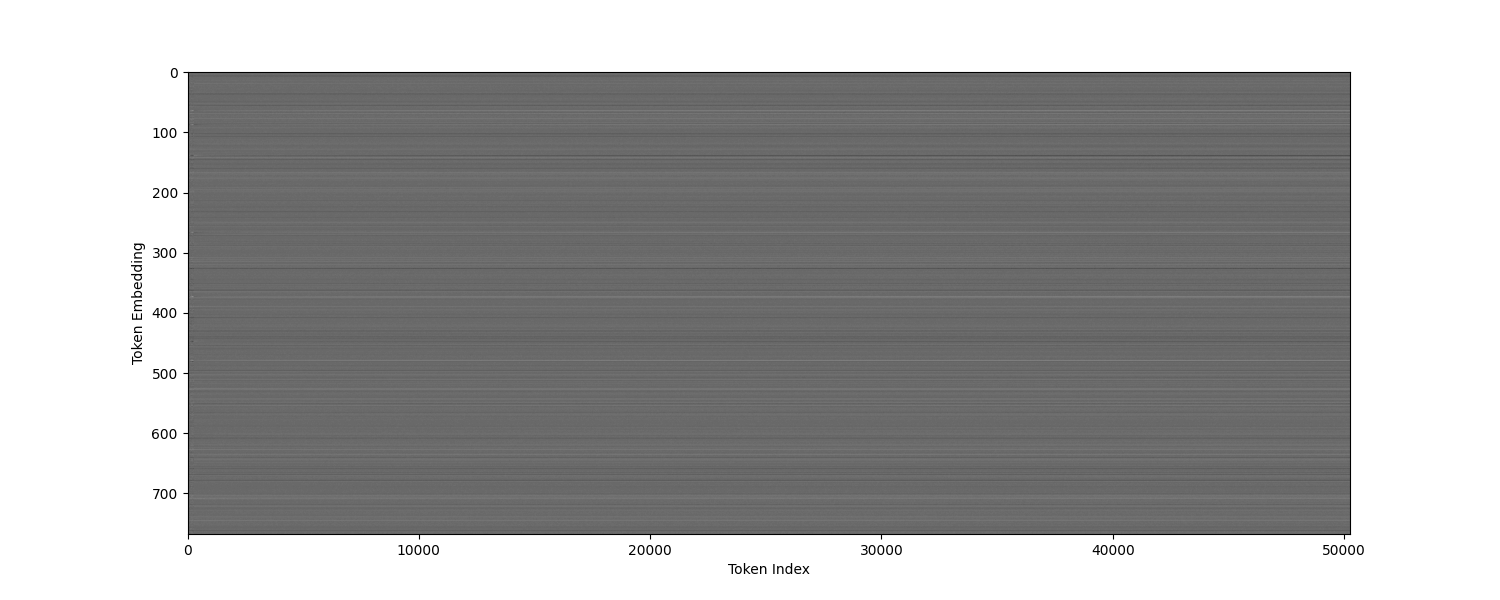

In [ ]:

%matplotlib widget
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.imshow(sd_hf["transformer.wte.weight"].T, cmap="gray", aspect='auto')
plt.xlabel('Token Index')
plt.ylabel('Token Embedding')
plt.show()

In [ ]:
from transformers import GPT2Tokenizer

# Load the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Now you can investigate those suspicious tokens
suspicious_range = range(200, 300)
for i in suspicious_range:
    token = tokenizer.convert_ids_to_tokens([i])[0]
    print(f"Token {i}: '{token}'")

In [10]:
print(f"Model embedding vocab size: {sd_hf['transformer.wte.weight'].shape[0]}")
print(f"Tokenizer vocab size: {len(tokenizer)}")

Model embedding vocab size: 50257
Tokenizer vocab size: 50257


In [19]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=35, num_return_sequences=5)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself. It is not the"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know how to represent our language"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that front, and the compiler"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how it works.\n\n"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that I could use to describe"}]

In [20]:
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Hello, I'm a language model, it's almost like this: a set of languages. Let's define a language model for each one.\n"},
 {'generated_text': "Hello, I'm a language model, I've been doing a lot of research, I would love to have this discussion in your field of studies,"},
 {'generated_text': "Hello, I'm a language model, which means I'm a good enough student to know what types of syntax-related languages (or syntax syntax trees"},
 {'generated_text': "Hello, I'm a language model, not an abstraction. But this may not always be true, and it may be that you just don't expect"},
 {'generated_text': 'Hello, I\'m a language model, right?" When asked why he wants to take the language model seriously in any way, Pritchard replied:'}]